[data dictionary](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

In [436]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

In [437]:
# import
train = pd.read_csv('datasets/train.csv')

# pythonize columns
train.columns = [x.lower().replace(' ','_').replace('/','_') for x in train.columns]

# drop id and set pid as index
train.set_index('pid', inplace = True)
train.drop('id', axis = 1, inplace = True)

train.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
pid,,,,,,,,,,,,,,,,,,,,,
533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [438]:
train.columns

Index(['ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod_add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish', 'gara

In [439]:
train.shape

(2051, 79)

# Review target column

In [440]:
train.saleprice.describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

In [441]:
saleprice_mean = train.saleprice.describe()['mean']
saleprice_std = train.saleprice.describe()['std']

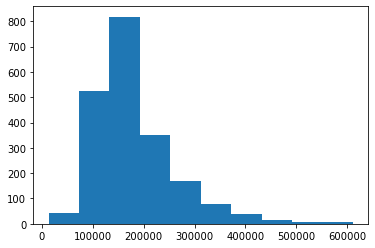

In [442]:
# plot it
plt.hist(train.saleprice);

# Review Data and Individual Columns for Outliers, etc.

##  Cols [0,10] . finished [0,6]

In [443]:
train.dtypes[:10]

ms_subclass       int64
ms_zoning        object
lot_frontage    float64
lot_area          int64
street           object
alley            object
lot_shape        object
land_contour     object
utilities        object
lot_config       object
dtype: object

**Observations**
  *  `ms_subclass` should be an object so we don't lose leading zeroes

In [444]:
# check for nulls
train.isnull().sum()[:10]

ms_subclass        0
ms_zoning          0
lot_frontage     330
lot_area           0
street             0
alley           1911
lot_shape          0
land_contour       0
utilities          0
lot_config         0
dtype: int64

**Observations**
1. `alley` has 1911 nulls out of 2051 records. Consider turning this into a dummy for alley or no alley
2. `lot_frontage` has 16% null coverage .. possibly due to apartments?
3. Everything else looks good!

In [445]:
train.lot_frontage.describe()

count    1721.000000
mean       69.055200
std        23.260653
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: lot_frontage, dtype: float64

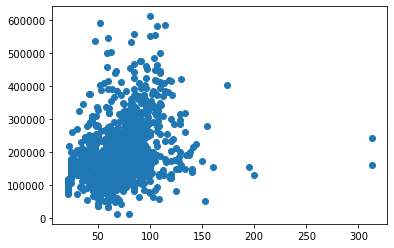

In [446]:
# plot it
plt.scatter(train.lot_frontage, train.saleprice);

In [447]:
# impute lot_frontage with the mean
lot_frontage_mean = SimpleImputer(strategy = 'mean')

train.lot_frontage = lot_frontage_mean.fit_transform(train[['lot_frontage']])

train.lot_frontage.describe()

count    2051.000000
mean       69.055200
std        21.306357
min        21.000000
25%        60.000000
50%        69.055200
75%        78.000000
max       313.000000
Name: lot_frontage, dtype: float64

In [448]:
# review alley
train.alley.unique()

train.alley.map(lambda x: 0 if pd.isnull(x) else x).value_counts(normalize=True)

0       0.931741
Grvl    0.041443
Pave    0.026816
Name: alley, dtype: float64

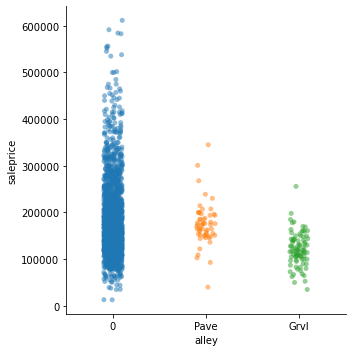

In [449]:
sns.catplot(x="alley", y="saleprice", data=pd.DataFrame(train.alley.map(lambda x: 0 if pd.isnull(x) else x))\
            .join(train.saleprice),
             alpha = 0.5)


In [450]:
train.alley = train.alley.map(lambda x: 0 if pd.isnull(x) else 1)
train.rename(columns = {'alley': 'has_alley'}, inplace = True)  
train.head().iloc[:,0:10]

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,has_alley,lot_shape,land_contour,utilities,lot_config
pid,,,,,,,,,,
533352170,60,RL,69.0552,13517,Pave,0,IR1,Lvl,AllPub,CulDSac
531379050,60,RL,43.0000,11492,Pave,0,IR1,Lvl,AllPub,CulDSac
535304180,20,RL,68.0000,7922,Pave,0,Reg,Lvl,AllPub,Inside
916386060,60,RL,73.0000,9802,Pave,0,Reg,Lvl,AllPub,Inside
906425045,50,RL,82.0000,14235,Pave,0,IR1,Lvl,AllPub,Inside


In [451]:
# review ms_subclass

# add 0 and make a string
train.ms_subclass = ['0' + str(i) if len(str(i)) == 2 else str(i) for i in train.ms_subclass]
train.ms_subclass.unique()



array(['060', '020', '050', '180', '160', '070', '120', '190', '085',
       '030', '090', '080', '075', '045', '040', '150'], dtype=object)

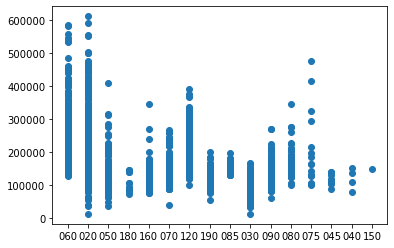

In [452]:
# see distribution for ms_subclass
plt.scatter(train.ms_subclass, train.saleprice);

**Observation**
  *  group these by saleprice mean into a few groups

In [453]:
train.saleprice.describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

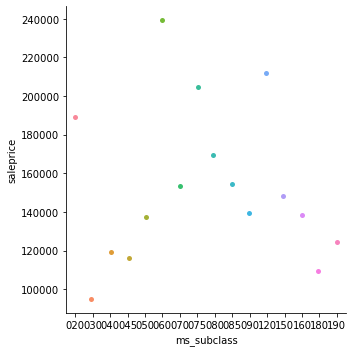

In [454]:
sns.catplot(x='ms_subclass', y = 'saleprice', data = pd.DataFrame(train.groupby('ms_subclass').mean().saleprice).reset_index())

**Observations**
  *  Clear grouping for ms_subclasses above 180k .. close to the mean!
  *  Let's split ms_subclass into two groups, below mean and above mean

In [455]:
# ms_subclass_mean = train.ms_subclass.map(lambda x: 0 if pd.isnull(x) else 1)
# train['alley'] = is_alley
# train.rename(columns = {'alley': 'is_alley'}, inplace = True)  
# train.head()


ms_subclass_above_mean = train.ms_subclass.map(train.groupby('ms_subclass').mean().saleprice > saleprice_mean).astype(int)
train['ms_subclass_above_mean'] = ms_subclass_above_mean

In [456]:
# drop ms_subclass
train.drop('ms_subclass', axis = 1, inplace=True)
train.head().iloc[:,0:10]

,ms_zoning,lot_frontage,lot_area,street,has_alley,lot_shape,land_contour,utilities,lot_config,land_slope
pid,,,,,,,,,,
533352170,RL,69.0552,13517,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl
531379050,RL,43.0000,11492,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl
535304180,RL,68.0000,7922,Pave,0,Reg,Lvl,AllPub,Inside,Gtl
916386060,RL,73.0000,9802,Pave,0,Reg,Lvl,AllPub,Inside,Gtl
906425045,RL,82.0000,14235,Pave,0,IR1,Lvl,AllPub,Inside,Gtl


In [457]:
# review ms_zoning unique values
train.ms_zoning.unique()

# update C A and I to represent their zones from data dict
train.ms_zoning = train.ms_zoning.apply(lambda x: x[0] if len(x)>2 else x)
train.ms_zoning.unique()

array(['RL', 'RM', 'FV', 'C', 'A', 'RH', 'I'], dtype=object)

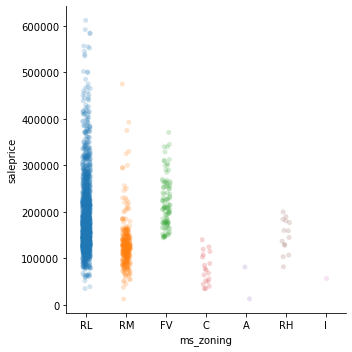

In [458]:
# see dispersion
sns.catplot(x = 'ms_zoning', y='saleprice', data = train, alpha = 0.2)

In [459]:
train.ms_zoning.value_counts(normalize=True)

RL    0.779132
RM    0.154071
FV    0.049244
C     0.009264
RH    0.006826
A     0.000975
I     0.000488
Name: ms_zoning, dtype: float64

In [460]:
# dummy RL and FV
train = train.join(pd.get_dummies(train.ms_zoning, prefix = 'ms_zoning')\
                   .loc[:,['ms_zoning_RL','ms_zoning_FV']])
train.head().iloc[:,-5:]

,sale_type,saleprice,ms_subclass_above_mean,ms_zoning_RL,ms_zoning_FV
pid,,,,,
533352170,WD,130500,1,1,0
531379050,WD,220000,1,1,0
535304180,WD,109000,1,1,0
916386060,WD,174000,1,1,0
906425045,WD,138500,0,1,0


In [461]:
# review lot_frontage
train.lot_frontage.describe()

count    2051.000000
mean       69.055200
std        21.306357
min        21.000000
25%        60.000000
50%        69.055200
75%        78.000000
max       313.000000
Name: lot_frontage, dtype: float64

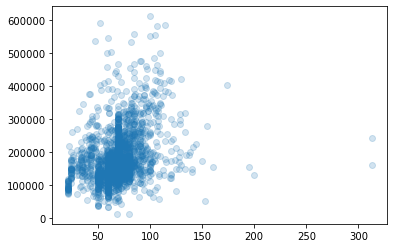

In [462]:
# plot lot_frontage
plt.scatter(train.lot_frontage, train.saleprice, alpha=0.2)

In [463]:
# drop two big outliers
train = train[train.lot_frontage < 250]
train.lot_area.describe()

count      2049.000000
mean      10030.358712
std        6628.642593
min        1300.000000
25%        7500.000000
50%        9405.000000
75%       11500.000000
max      159000.000000
Name: lot_area, dtype: float64

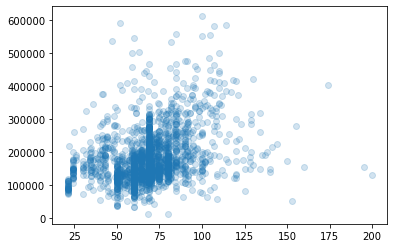

In [464]:
# plot lot_frontage
plt.scatter(train.lot_frontage, train.saleprice, alpha=0.2)

In [465]:
# review lot_area
train.lot_area.describe()

count      2049.000000
mean      10030.358712
std        6628.642593
min        1300.000000
25%        7500.000000
50%        9405.000000
75%       11500.000000
max      159000.000000
Name: lot_area, dtype: float64

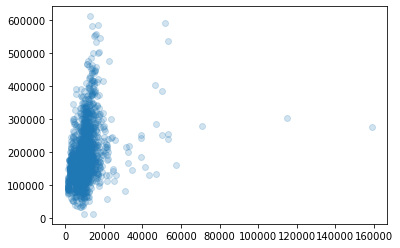

In [466]:
# plot lot_area
plt.scatter(train.lot_area, train.saleprice, alpha = 0.2);

In [467]:
# drop two big outliers
train = train[train.lot_area < 80_000]
train.lot_area.describe()

count     2047.000000
mean      9906.231558
std       5264.901142
min       1300.000000
25%       7500.000000
50%       9400.000000
75%      11500.000000
max      70761.000000
Name: lot_area, dtype: float64

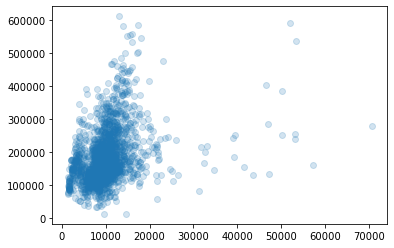

In [468]:
# plot lot_area
plt.scatter(train.lot_area, train.saleprice, alpha = 0.2);

In [469]:
# review street
train.street.unique()

array(['Pave', 'Grvl'], dtype=object)

In [470]:
# dummify to is_pave
train.street.map(lambda x: x == 'Pave').astype(int).value_counts(normalize = True)

1    0.99658
0    0.00342
Name: street, dtype: float64

**Observation**
only .3% of data set is not gravel, drop column

In [471]:
train.drop('street', axis=1, inplace=True)
train.head()

,ms_zoning,lot_frontage,lot_area,has_alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,...,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,ms_subclass_above_mean,ms_zoning_RL,ms_zoning_FV
pid,,,,,,,,,,,,,,,,,,,,,
533352170,RL,69.0552,13517,0,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,...,NaN,NaN,0,3,2010,WD,130500,1,1,0
531379050,RL,43.0000,11492,0,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,...,NaN,NaN,0,4,2009,WD,220000,1,1,0
535304180,RL,68.0000,7922,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,NaN,NaN,0,1,2010,WD,109000,1,1,0
916386060,RL,73.0000,9802,0,Reg,Lvl,AllPub,Inside,Gtl,Timber,...,NaN,NaN,0,4,2010,WD,174000,1,1,0
906425045,RL,82.0000,14235,0,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,...,NaN,NaN,0,3,2010,WD,138500,0,1,0


In [472]:
# is alley has already been covered

In [473]:
# review lot_shape
train.lot_shape.value_counts(normalize = True)

Reg    0.632633
IR1    0.338056
IR2    0.025403
IR3    0.003908
Name: lot_shape, dtype: float64

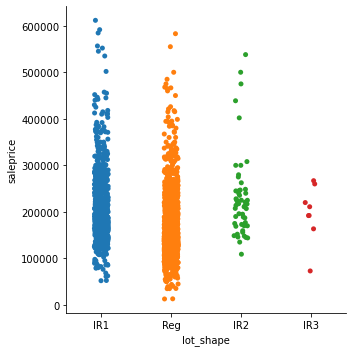

In [474]:
sns.catplot(x = 'lot_shape', y='saleprice', data=train)

**Observation** change to is_regular

In [475]:
train.groupby('lot_shape').mean().saleprice

lot_shape
IR1    211848.670520
IR2    231663.673077
IR3    197330.000000
Reg    162925.812355
Name: saleprice, dtype: float64

In [476]:
train.lot_shape = train.lot_shape.map(lambda x: x == 'Reg').astype(int)
train.rename(columns = {'lot_shape': 'is_lot_shape_regluar'}, inplace=True)
train.head().iloc[:,:10]

,ms_zoning,lot_frontage,lot_area,has_alley,is_lot_shape_regluar,land_contour,utilities,lot_config,land_slope,neighborhood
pid,,,,,,,,,,
533352170,RL,69.0552,13517,0,0,Lvl,AllPub,CulDSac,Gtl,Sawyer
531379050,RL,43.0000,11492,0,0,Lvl,AllPub,CulDSac,Gtl,SawyerW
535304180,RL,68.0000,7922,0,1,Lvl,AllPub,Inside,Gtl,NAmes
916386060,RL,73.0000,9802,0,1,Lvl,AllPub,Inside,Gtl,Timber
906425045,RL,82.0000,14235,0,0,Lvl,AllPub,Inside,Gtl,SawyerW


In [477]:
# review land_contour
train.land_contour.value_counts(normalize=True)

Lvl    0.900342
HLS    0.041036
Bnk    0.038593
Low    0.020029
Name: land_contour, dtype: float64

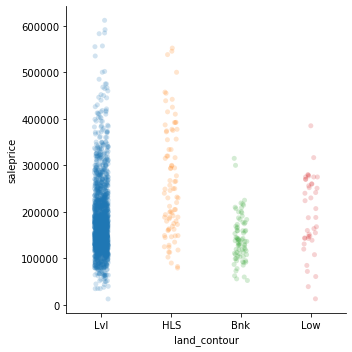

In [478]:
# plot
sns.catplot(x = 'land_contour', y= 'saleprice', data=train, alpha = 0.2);

In [479]:
train.groupby('land_contour').mean().saleprice

land_contour
Bnk    142651.924051
HLS    262595.678571
Low    194913.756098
Lvl    178998.564840
Name: saleprice, dtype: float64

In [480]:
# turn into is_land_countour_lvl
# train.land_contour = train.land_contour.map(lambda x: x == 'Lvl').astype(int)
train.rename(columns = {'land_contour': 'is_land_contour_lvl'}, inplace=True)
train.head().iloc[:,:10]

,ms_zoning,lot_frontage,lot_area,has_alley,is_lot_shape_regluar,is_land_contour_lvl,utilities,lot_config,land_slope,neighborhood
pid,,,,,,,,,,
533352170,RL,69.0552,13517,0,0,Lvl,AllPub,CulDSac,Gtl,Sawyer
531379050,RL,43.0000,11492,0,0,Lvl,AllPub,CulDSac,Gtl,SawyerW
535304180,RL,68.0000,7922,0,1,Lvl,AllPub,Inside,Gtl,NAmes
916386060,RL,73.0000,9802,0,1,Lvl,AllPub,Inside,Gtl,Timber
906425045,RL,82.0000,14235,0,0,Lvl,AllPub,Inside,Gtl,SawyerW


In [481]:
# review utilities
train.utilities.unique()

train.utilities.value_counts(normalize=True)

AllPub    0.999023
NoSeWa    0.000489
NoSewr    0.000489
Name: utilities, dtype: float64

**Observation**
only .3% of data set is not AllPub, drop column

In [482]:
train.drop('utilities', axis=1, inplace=True)
train.head().iloc[:,:10]

,ms_zoning,lot_frontage,lot_area,has_alley,is_lot_shape_regluar,is_land_contour_lvl,lot_config,land_slope,neighborhood,condition_1
pid,,,,,,,,,,
533352170,RL,69.0552,13517,0,0,Lvl,CulDSac,Gtl,Sawyer,RRAe
531379050,RL,43.0000,11492,0,0,Lvl,CulDSac,Gtl,SawyerW,Norm
535304180,RL,68.0000,7922,0,1,Lvl,Inside,Gtl,NAmes,Norm
916386060,RL,73.0000,9802,0,1,Lvl,Inside,Gtl,Timber,Norm
906425045,RL,82.0000,14235,0,0,Lvl,Inside,Gtl,SawyerW,Norm


In [483]:
# review lot config
train.lot_config.unique()

train.lot_config.value_counts(normalize=True)

Inside     0.733757
Corner     0.169516
CulDSac    0.063019
FR2        0.029311
FR3        0.004397
Name: lot_config, dtype: float64

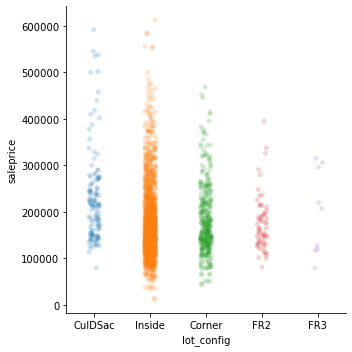

In [484]:
# plot
sns.catplot(x='lot_config', y='saleprice', data=train, alpha = 0.2);

**Observation**
  *  Breakout `Inside` and `Corner` separately.

In [485]:
# dummy
train = train.join(pd.get_dummies(train.lot_config, prefix = 'lot_config').loc[:,['lot_config_Inside','lot_config_Corner']])
train.head().iloc[:,-5:]

,ms_subclass_above_mean,ms_zoning_RL,ms_zoning_FV,lot_config_Inside,lot_config_Corner
pid,,,,,
533352170,1,1,0,0,0
531379050,1,1,0,0,0
535304180,1,1,0,1,0
916386060,1,1,0,1,0
906425045,0,1,0,1,0


In [486]:
# drop lot config
train.drop('lot_config', axis=1, inplace=True)
train.head().iloc[:,:10]

,ms_zoning,lot_frontage,lot_area,has_alley,is_lot_shape_regluar,is_land_contour_lvl,land_slope,neighborhood,condition_1,condition_2
pid,,,,,,,,,,
533352170,RL,69.0552,13517,0,0,Lvl,Gtl,Sawyer,RRAe,Norm
531379050,RL,43.0000,11492,0,0,Lvl,Gtl,SawyerW,Norm,Norm
535304180,RL,68.0000,7922,0,1,Lvl,Gtl,NAmes,Norm,Norm
916386060,RL,73.0000,9802,0,1,Lvl,Gtl,Timber,Norm,Norm
906425045,RL,82.0000,14235,0,0,Lvl,Gtl,SawyerW,Norm,Norm


##  Cols [6,16] . finished [6,9]

In [487]:
train.columns[6:16]

Index(['land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod_add'],
      dtype='object')

In [488]:
train.dtypes[6:16]

land_slope        object
neighborhood      object
condition_1       object
condition_2       object
bldg_type         object
house_style       object
overall_qual       int64
overall_cond       int64
year_built         int64
year_remod_add     int64
dtype: object

In [489]:
# check for nulls
train.isnull().sum()[6:16]

# no nulls!

land_slope        0
neighborhood      0
condition_1       0
condition_2       0
bldg_type         0
house_style       0
overall_qual      0
overall_cond      0
year_built        0
year_remod_add    0
dtype: int64

In [490]:
# review land_slope
train.land_slope.unique()

train.land_slope.value_counts(normalize=True)

Gtl    0.953591
Mod    0.042501
Sev    0.003908
Name: land_slope, dtype: float64

In [491]:
# change to is_gtl

train.land_slope = train.land_slope.map(lambda x: x == 'Gtl').astype(int)
train.rename(columns = {'land_slope': 'land_slope_is_Gtl'}, inplace = True)
train.head().iloc[:,6:16]

,land_slope_is_Gtl,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add
pid,,,,,,,,,,
533352170,1,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005
531379050,1,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997
535304180,1,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007
916386060,1,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007
906425045,1,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993


In [492]:
# review neighborhood
neighborhood_from_dict = ['Blmngtn','Blueste','BrDale','BrkSide','ClearCr','CollgCr','Crawfor','Edwards',\
                          'Gilbert','Greens','GrnHill','IDOTRR','Landmrk','MeadowV','Mitchel','Names','NoRidge',\
                          'NPkVill','NridgHt','NWAmes','OldTown','SWISU','Sawyer','SawyerW','Somerst','StoneBr',\
                          'Timber','Veenker']

train[~train.neighborhood.isin(neighborhood_from_dict)].neighborhood.unique()


array(['NAmes'], dtype=object)

In [493]:
# rename 'NAmes' to be 'Names' to match data dictionary
train.neighborhood = train.neighborhood.map(lambda x: 'Names' if x == 'NAmes' else x)

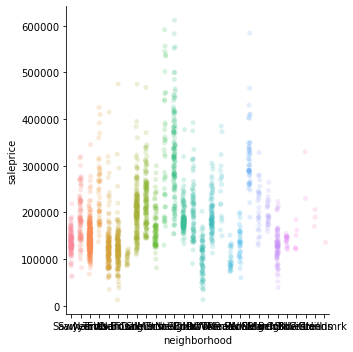

In [494]:
# plot
sns.catplot(x = 'neighborhood', y='saleprice', data = train, alpha = 0.2)

In [495]:
n_train = pd.DataFrame(train.neighborhood.map(train.groupby('neighborhood').mean().saleprice.map(lambda x: 0 if x < saleprice_mean - saleprice_std\
                                                          else 1 if x < saleprice_mean\
                                                          else 2 if x <= saleprice_mean + saleprice_std
                                                          else 3 if x > saleprice_mean + saleprice_std
                                                          else np.nan)))
n_train.rename(columns = {'neighborhood': 'n_id'}, inplace=True)
n_train= n_train.join(train[['neighborhood', 'saleprice']])

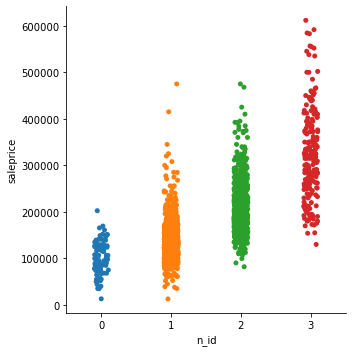

In [496]:
sns.catplot(x = 'n_id', y='saleprice', data = n_train)

**Observation**
  *  Split appears to be working as intended, add to train dataframe

In [497]:
train.shape

(2047, 80)

In [498]:
train = pd.merge(train,
             n_train[['n_id']],
             left_index = True,
             right_index = True)

In [499]:
train.shape

(2047, 81)

In [500]:
# rename n_id
train.rename(columns = {'n_id': 'neighborhood_group'}, inplace=True)
train.head().iloc[:,-5:]

,ms_zoning_RL,ms_zoning_FV,lot_config_Inside,lot_config_Corner,neighborhood_group
pid,,,,,
533352170,1,0,0,0,1
531379050,1,0,0,0,2
535304180,1,0,1,0,1
916386060,1,0,1,0,2
906425045,1,0,1,0,2


In [501]:
# now we can dummy by neighborhood_group
train = train.join(pd.get_dummies(train.neighborhood_group, prefix = 'neighborhood_group')\
                   .loc[:,['neighborhood_group_1','neighborhood_group_2','neighborhood_group_3']])

train.head().iloc[:,-5:]

,lot_config_Corner,neighborhood_group,neighborhood_group_1,neighborhood_group_2,neighborhood_group_3
pid,,,,,
533352170,0,1,1,0,0
531379050,0,2,0,1,0
535304180,0,1,1,0,0
916386060,0,2,0,1,0
906425045,0,2,0,1,0


In [502]:
# drop neighborhood
train.drop('neighborhood', axis=1, inplace = True)
train.head().iloc[:,6:16]


,land_slope_is_Gtl,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style
pid,,,,,,,,,,
533352170,1,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable
531379050,1,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable
535304180,1,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable
916386060,1,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable
906425045,1,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable


In [503]:
# review condition_1
train.condition_1.unique()

train.condition_1.value_counts()

Norm      1765
Feedr      108
Artery      70
RRAn        36
PosN        27
RRAe        21
PosA        11
RRNn         6
RRNe         3
Name: condition_1, dtype: int64

In [504]:
# review condition_2
train.condition_2.unique()

train.condition_2.value_counts()

Norm      2021
Feedr       11
Artery       5
PosA         3
PosN         3
RRNn         2
RRAe         1
RRAn         1
Name: condition_2, dtype: int64

In [505]:
pd.DataFrame(train.condition_1 + train.condition_2)[0].value_counts(normalize=True)

NormNorm        0.862237
FeedrNorm       0.049340
ArteryNorm      0.032731
RRAnNorm        0.013190
PosNNorm        0.011724
RRAeNorm        0.010259
PosANorm        0.004397
RRAnFeedr       0.003908
RRNnNorm        0.001954
RRNeNorm        0.001466
PosNPosN        0.001466
FeedrRRNn       0.000977
ArteryArtery    0.000977
FeedrFeedr      0.000977
PosAPosA        0.000977
FeedrRRAe       0.000489
RRNnFeedr       0.000489
ArteryPosA      0.000489
RRAnArtery      0.000489
RRNnArtery      0.000489
FeedrArtery     0.000489
FeedrRRAn       0.000489
Name: 0, dtype: float64

In [506]:
train.condition_1

pid
533352170    RRAe
531379050    Norm
535304180    Norm
916386060    Norm
906425045    Norm
             ... 
921126030    Norm
905377130    Norm
909253010    Norm
535179160    Norm
527162130    Norm
Name: condition_1, Length: 2047, dtype: object

In [507]:
# get absolute membership

conditions = pd.DataFrame(train.condition_1 + ';' + train.condition_2,
                          columns = ['conditions'])

conditions.conditions.str.get_dummies(';').mean().sort_values()

RRNe      0.001466
RRNn      0.003908
PosA      0.005862
RRAe      0.010747
PosN      0.013190
RRAn      0.018075
Artery    0.035662
Feedr     0.057157
Norm      0.987298
dtype: float64

In [508]:
# consolidate condition_1 and condition_2 into is_condition_normal 
train = train.join(train.apply(lambda row: row.condition_1 == 'Norm' or row.condition_2 == 'Norm',
                               axis = 1)\
                   .rename('is_condition_normal'))

train.head().iloc[:,-5:]

,neighborhood_group,neighborhood_group_1,neighborhood_group_2,neighborhood_group_3,is_condition_normal
pid,,,,,
533352170,1,1,0,0,True
531379050,2,0,1,0,True
535304180,1,1,0,0,True
916386060,2,0,1,0,True
906425045,2,0,1,0,True


In [509]:
# drop condition columns
train.drop(['condition_1', 'condition_2'], axis = 1, inplace = True)
train.head().iloc[:,6:16]

,land_slope_is_Gtl,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st
pid,,,,,,,,,,
533352170,1,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard
531379050,1,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd
535304180,1,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd
916386060,1,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd
906425045,1,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng


In [510]:
# review bldg_type
train.bldg_type.unique()

array(['1Fam', 'TwnhsE', 'Twnhs', '2fmCon', 'Duplex'], dtype=object)

In [511]:
train.bldg_type.value_counts(normalize=True)

1Fam      0.828530
TwnhsE    0.078652
Duplex    0.036639
Twnhs     0.033708
2fmCon    0.022472
Name: bldg_type, dtype: float64

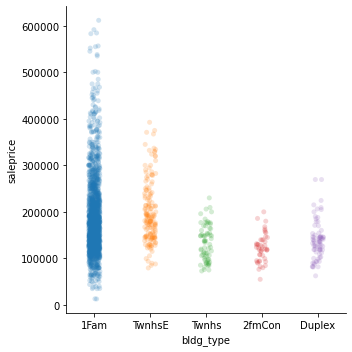

In [512]:
sns.catplot(x = 'bldg_type', y = 'saleprice', data = train, alpha = 0.2)

**Observation** make two dummies

In [513]:
train = train.join(pd.get_dummies(train.bldg_type, prefix = 'bldg_type').loc[:,['bldg_type_1Fam','bldg_type_TwnhsE']])
train.head().iloc[:,-5:]

,neighborhood_group_2,neighborhood_group_3,is_condition_normal,bldg_type_1Fam,bldg_type_TwnhsE
pid,,,,,
533352170,0,0,True,1,0
531379050,1,0,True,1,0
535304180,0,0,True,1,0
916386060,1,0,True,1,0
906425045,1,0,True,1,0


In [514]:
# drop 'bldg_type'
train.drop('bldg_type', axis = 1, inplace = True)
train.head().iloc[:,6:16]

,land_slope_is_Gtl,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd
pid,,,,,,,,,,
533352170,1,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood
531379050,1,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd
535304180,1,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd
916386060,1,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd
906425045,1,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood


In [515]:
# review house_style
sorted(train.house_style.unique())

train.house_style.value_counts(normalize=True)

1Story    0.516365
2Story    0.291646
1.5Fin    0.106009
SLvl      0.045921
SFoyer    0.024426
2.5Unf    0.006839
1.5Unf    0.005862
2.5Fin    0.002931
Name: house_style, dtype: float64

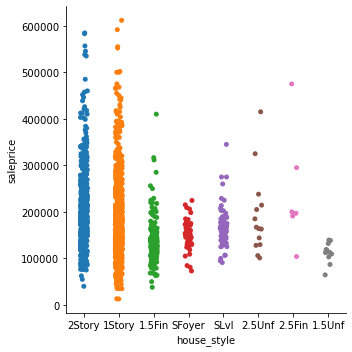

In [516]:
# plot
sns.catplot(x = 'house_style', y = 'saleprice', data = train)

In [517]:
# create 2 dummies
train = train.join(pd.get_dummies(train.house_style, prefix = 'house_style').loc[:,['house_style_2Story','house_style_1Story']])
train.head().iloc[:,-5:]

,is_condition_normal,bldg_type_1Fam,bldg_type_TwnhsE,house_style_2Story,house_style_1Story
pid,,,,,
533352170,True,1,0,1,0
531379050,True,1,0,1,0
535304180,True,1,0,0,1
916386060,True,1,0,1,0
906425045,True,1,0,0,0


In [518]:
# drop house_style
train.drop('house_style', axis = 1, inplace = True)
train.head().iloc[:,6:16]

,land_slope_is_Gtl,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type
pid,,,,,,,,,,
533352170,1,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace
531379050,1,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace
535304180,1,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None
916386060,1,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None
906425045,1,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None


In [519]:
# review overall qual
train.overall_qual.describe()

# looks good

count    2047.000000
mean        6.109428
std         1.424799
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: overall_qual, dtype: float64

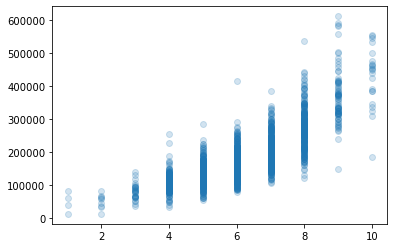

In [520]:
# plot
plt.scatter(x = train.overall_qual, y= train.saleprice, alpha = 0.2)

In [521]:
# review overall condition
train.overall_cond.describe()

# looks good

count    2047.000000
mean        5.561309
std         1.104522
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: overall_cond, dtype: float64

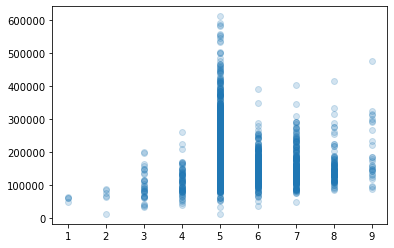

In [522]:
# plot
plt.scatter(x = train.overall_cond, y= train.saleprice, alpha = 0.2)

In [523]:
# review year built
train.year_built.describe()

# looks good

count    2047.000000
mean     1971.703957
std        30.194082
min      1872.000000
25%      1953.000000
50%      1974.000000
75%      2001.000000
max      2010.000000
Name: year_built, dtype: float64

In [524]:
# convert this to home_age
train['home_age'] = train.year_built.map(lambda x: 2010 - x)

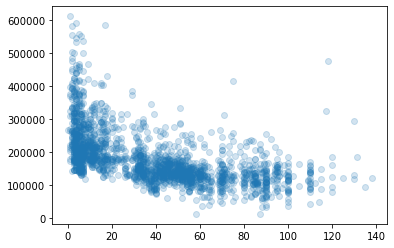

In [525]:
# plot
plt.scatter(x = train.home_age, y= train.saleprice, alpha = 0.2)

In [526]:
# review year remod
train.year_remod_add.value_counts()

1950    262
2006    138
2007    122
2005    100
2004     83
       ... 
1986      9
2010      8
1983      7
1981      6
1982      3
Name: year_remod_add, Length: 61, dtype: int64

In [527]:
# let's assume that no remodels were made the year the home was built. Create a bool for has_remodel
home_has_remodel = train.year_remod_add == train.year_built
train['home_has_remodel'] = home_has_remodel.astype(int)

In [528]:
#drop year_built and year_remod_add
train.drop(['year_built','year_remod_add'], axis = 1, inplace = True)
train.head().iloc[:,6:16]

,land_slope_is_Gtl,overall_qual,overall_cond,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual
pid,,,,,,,,,,
533352170,1,6,8,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd
531379050,1,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd
535304180,1,5,7,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA
916386060,1,5,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA
906425045,1,6,8,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA


##  Cols [9:19] . finished [9:13]

In [529]:
train.columns[9:19]

Index(['roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd',
       'mas_vnr_type', 'mas_vnr_area', 'exter_qual', 'exter_cond',
       'foundation', 'bsmt_qual'],
      dtype='object')

In [530]:
train.dtypes[9:19]

roof_style       object
roof_matl        object
exterior_1st     object
exterior_2nd     object
mas_vnr_type     object
mas_vnr_area    float64
exter_qual       object
exter_cond       object
foundation       object
bsmt_qual        object
dtype: object

In [531]:
# check for nulls
train.isnull().sum()[9:19]

roof_style       0
roof_matl        0
exterior_1st     0
exterior_2nd     0
mas_vnr_type    22
mas_vnr_area    22
exter_qual       0
exter_cond       0
foundation       0
bsmt_qual       55
dtype: int64

In [532]:
# review mas_vnr_type
train.mas_vnr_type.unique()

train.mas_vnr_type.map(lambda x: 0 if pd.isnull(x) else x).value_counts(normalize = True)

None       0.594529
BrkFace    0.307767
Stone      0.081094
0          0.010747
BrkCmn     0.005862
Name: mas_vnr_type, dtype: float64

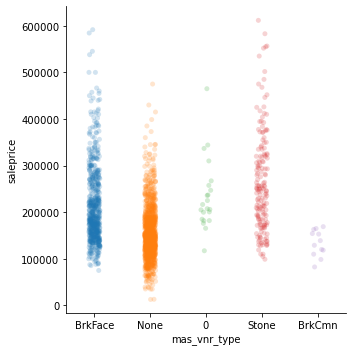

In [533]:
# plot it
sns.catplot(x = 'mas_vnr_type', y='saleprice',
            data=pd.DataFrame(train.mas_vnr_type.map(lambda x: 0 if pd.isnull(x) else x)).join(train.saleprice),
            alpha=0.2);

In [534]:
# rather than impute, make a dummy for Stone and BrkFace

In [535]:
train = train.join(pd.get_dummies(train.mas_vnr_type, prefix = 'mas_vnr_type').loc[:,['mas_vnr_type_Stone','mas_vnr_type_BrkFace']])
train.head().iloc[:,-5:]

,house_style_1Story,home_age,home_has_remodel,mas_vnr_type_Stone,mas_vnr_type_BrkFace
pid,,,,,
533352170,0,34,0,0,1
531379050,0,14,0,0,1
535304180,1,57,0,0,0
916386060,0,4,0,0,0
906425045,0,110,0,0,0


In [565]:
# drop mas_vnr_type
train.drop('mas_vnr_type', axis=1, inplace=True)
train.head().iloc[:,9:19]

,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2
pid,,,,,,,,,,
533352170,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf
531379050,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf
535304180,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf
916386060,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf
906425045,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf


In [536]:
# review mas_vnr_area
train.mas_vnr_area.describe()

count    2025.000000
mean       99.093333
std       174.149618
min         0.000000
25%         0.000000
50%         0.000000
75%       160.000000
max      1600.000000
Name: mas_vnr_area, dtype: float64

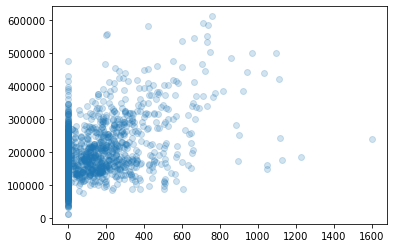

In [539]:
# plot
plt.scatter(train.mas_vnr_area, train.saleprice, alpha = 0.2)

In [540]:
# impute nulls with median
mas_vnr_area_median = SimpleImputer(strategy = 'median')

train.mas_vnr_area = mas_vnr_area_median.fit_transform(train[['mas_vnr_area']])

train.mas_vnr_area.describe()

count    2047.000000
mean       98.028334
std       173.512052
min         0.000000
25%         0.000000
50%         0.000000
75%       158.000000
max      1600.000000
Name: mas_vnr_area, dtype: float64

In [541]:
# review bsmt_qual
train.bsmt_qual.unique()

train.bsmt_qual.map(lambda x: 0 if pd.isnull(x) else x).value_counts()

TA    887
Gd    861
Ex    183
Fa     60
0      55
Po      1
Name: bsmt_qual, dtype: int64

In [542]:
# there are a lot of basement things, let's look at all of them and create some helpers
basements = train[['bsmt_qual','bsmt_cond', 'bsmt_exposure','bsmtfin_type_1','bsmtfin_sf_1','bsmtfin_type_2','bsmtfin_sf_2',\
                  'bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath']]

In [543]:
basements.isnull().sum()

bsmt_qual         55
bsmt_cond         55
bsmt_exposure     58
bsmtfin_type_1    55
bsmtfin_sf_1       1
bsmtfin_type_2    56
bsmtfin_sf_2       1
bsmt_unf_sf        1
total_bsmt_sf      1
bsmt_full_bath     2
bsmt_half_bath     2
dtype: int64

**Observations**
  *  `bsmt_exposure` includes unfinished basements
  *  `bsmt_qual` has 55 nulls which are uniform across all basement categories (either as null or 0). This can be expanded out
      to a "has_basement" indicator

In [544]:
# impute bsmt_qual with 'NA'
train.bsmt_qual = train.bsmt_qual.map(lambda x: 'NA' if pd.isnull(x) else x)

In [545]:
# create "has_basement"
train['has_basement'] = train.bsmt_qual != 'NA'

In [546]:
# review roof_style
sorted(train.roof_style.unique())

train.roof_style.value_counts(normalize = True)

Gable      0.789936
Hip        0.193454
Flat       0.005862
Gambrel    0.005862
Mansard    0.003420
Shed       0.001466
Name: roof_style, dtype: float64

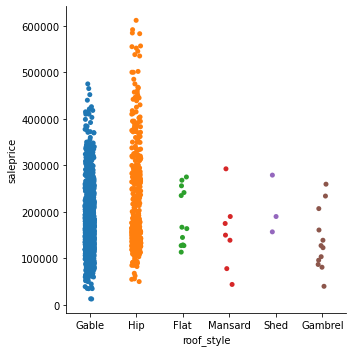

In [547]:
# plot
sns.catplot(x = 'roof_style', y='saleprice', data = train)

In [548]:
# create two dummies
train = train.join(pd.get_dummies(train.roof_style, prefix = 'roof_style').loc[:,['roof_style_Gable','roof_style_Hip']])

In [549]:
# drop roof_style
train.drop('roof_style', axis = 1, inplace=True)
train.head().iloc[:,9:19]

,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond
pid,,,,,,,,,,
533352170,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA
531379050,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA
535304180,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA
916386060,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA
906425045,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd


In [550]:
# review roof_matl
sorted(train.roof_matl.unique())

train.roof_matl.value_counts(normalize=True)

CompShg    0.988276
Tar&Grv    0.006839
WdShngl    0.002443
WdShake    0.001954
Membran    0.000489
Name: roof_matl, dtype: float64

In [551]:
# drop it
train.drop('roof_matl', axis = 1, inplace=True)
train.head().iloc[:,9:19]

,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure
pid,,,,,,,,,,
533352170,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No
531379050,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No
535304180,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No
916386060,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No
906425045,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No


In [552]:
# review exterior_1st
exterior_1st_from_dict = ['AsbShng','AsphShn','BrkComm','BrkFace','CBlock','CemntBd','HdBoard','ImStucc',\
                          'MetalSd','Other','Plywood','PreCast','Stone','Stucco','VinylSd','Wd Sdng','WdShing']


train[~train.exterior_1st.isin(exterior_1st_from_dict)]

# looks good!

,ms_zoning,lot_frontage,lot_area,has_alley,is_lot_shape_regluar,is_land_contour_lvl,land_slope_is_Gtl,overall_qual,overall_cond,exterior_1st,...,bldg_type_TwnhsE,house_style_2Story,house_style_1Story,home_age,home_has_remodel,mas_vnr_type_Stone,mas_vnr_type_BrkFace,has_basement,roof_style_Gable,roof_style_Hip
pid,,,,,,,,,,,,,,,,,,,,,


In [553]:
# review exterior_2nd
train[~train.exterior_2nd.isin(exterior_1st_from_dict)].exterior_2nd.unique()

array(['CmentBd', 'Wd Shng', 'Brk Cmn'], dtype=object)

In [554]:
# replace vals
train.exterior_2nd = ['CemntBd' if val == 'CmentBd' else 'WdShing' if val == 'Wd Shng' else 'BrkComm' if val == 'Brk Cmn'\
else val for val in train.exterior_2nd]

train[~train.exterior_2nd.isin(exterior_1st_from_dict)].exterior_2nd.unique()

array([], dtype=object)

In [555]:
# get absolute membership

exteriors = pd.DataFrame(train.exterior_1st + ';' + train.exterior_2nd, columns = ['exteriors'])

exteriors.exteriors.str.get_dummies(';').mean().sort_values()

AsphShn    0.001466
CBlock     0.001466
Stone      0.003420
ImStucc    0.005374
BrkComm    0.008305
AsbShng    0.017587
Stucco     0.017587
BrkFace    0.032242
WdShing    0.036150
CemntBd    0.044455
Plywood    0.103566
Wd Sdng    0.146556
HdBoard    0.153884
MetalSd    0.163166
VinylSd    0.358085
dtype: float64

In [563]:
# make dummies for vinyl, metal, hd, wd, ply
exteriors = exteriors.exteriors.str.get_dummies(';').loc[:,['VinylSd','MetalSd','HdBoard','Wd Sdng','Plywood']]

exteriors.rename(columns = {col: 'exterior_has_'+col.replace(' ','_') for col in exteriors.columns}, inplace = True)

train = train.join(exteriors)
train.head().iloc[:,-7:]

,roof_style_Gable,roof_style_Hip,exterior_has_VinylSd,exterior_has_MetalSd,exterior_has_HdBoard,exterior_has_Wd_Sdng,exterior_has_Plywood
pid,,,,,,,
533352170,1,0,0,0,1,0,1
531379050,1,0,1,0,0,0,0
535304180,1,0,1,0,0,0,0
916386060,1,0,1,0,0,0,0
906425045,1,0,0,0,0,1,1


In [564]:
# drop exterior cols
train.drop(['exterior_1st','exterior_2nd'], axis = 1, inplace = True)
train.head().iloc[:,9:19]

,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1
pid,,,,,,,,,,
533352170,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0
531379050,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0
535304180,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0
916386060,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0
906425045,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0


In [566]:
# mas_vnr_type addressed earlier

In [567]:
# mas_vnr_area addressed earlier

In [568]:
# review exter_qual
train.exter_qual.unique()

train.exter_qual.value_counts(normalize=True)

TA    0.608207
Gd    0.340010
Ex    0.039082
Fa    0.012702
Name: exter_qual, dtype: float64

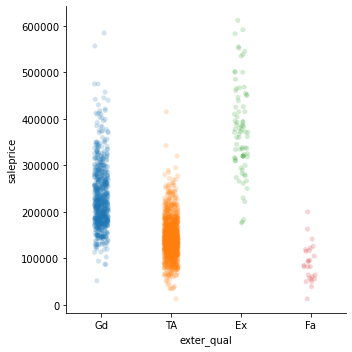

In [569]:
# plot it
sns.catplot(x = 'exter_qual', y='saleprice', data = train, alpha=0.2)

In [571]:
# dummy EX_GD together
train.exter_qual = train.exter_qual.map(lambda x: x == 'Gd' or x == 'Ex').astype(int)
train.rename(columns = {'exter_qual':'exter_qual_Ex_Gd'}, inplace=True)
train.head().iloc[:,9:19]

,mas_vnr_area,exter_qual_Ex_Gd,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2
pid,,,,,,,,,,
533352170,289.0,1,TA,CBlock,TA,TA,No,GLQ,533.0,Unf
531379050,132.0,1,TA,PConc,Gd,TA,No,GLQ,637.0,Unf
535304180,0.0,0,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf
916386060,0.0,0,TA,PConc,Gd,TA,No,Unf,0.0,Unf
906425045,0.0,0,TA,PConc,Fa,Gd,No,Unf,0.0,Unf


In [572]:
# review exter_cond
train.exter_cond.unique()

train.exter_cond.value_counts(normalize = True)

TA    0.866634
Gd    0.105032
Fa    0.023937
Ex    0.003420
Po    0.000977
Name: exter_cond, dtype: float64

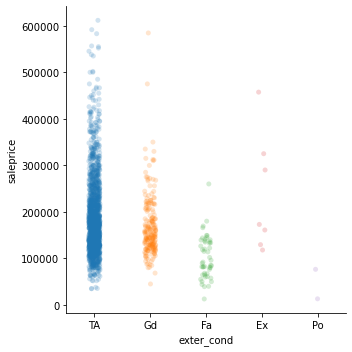

In [573]:
# plot it
sns.catplot(x = 'exter_cond', y='saleprice', data = train, alpha=0.2)

In [574]:
# dummy EX_GD together
train.exter_cond = train.exter_cond.map(lambda x: x == 'Gd' or x == 'Ex').astype(int)
train.rename(columns = {'exter_cond':'exter_cond_Ex_Gd'}, inplace=True)
train.head().iloc[:,9:19]

,mas_vnr_area,exter_qual_Ex_Gd,exter_cond_Ex_Gd,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2
pid,,,,,,,,,,
533352170,289.0,1,0,CBlock,TA,TA,No,GLQ,533.0,Unf
531379050,132.0,1,0,PConc,Gd,TA,No,GLQ,637.0,Unf
535304180,0.0,0,1,CBlock,TA,TA,No,GLQ,731.0,Unf
916386060,0.0,0,0,PConc,Gd,TA,No,Unf,0.0,Unf
906425045,0.0,0,0,PConc,Fa,Gd,No,Unf,0.0,Unf


In [575]:
# review foundation
train.foundation.unique()

train.foundation.value_counts(normalize=True)

PConc     0.451881
CBlock    0.420127
BrkTil    0.107963
Slab      0.016610
Stone     0.002443
Wood      0.000977
Name: foundation, dtype: float64

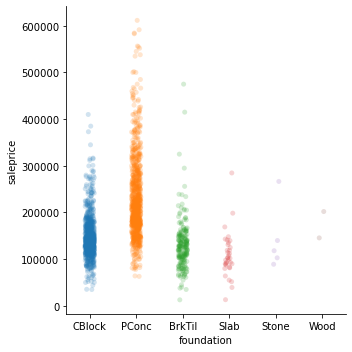

In [576]:
# plot it
sns.catplot(x = 'foundation', y='saleprice', data = train, alpha=0.2)

In [579]:
# dummy Pconc and Cblock
train = train.join(pd.get_dummies(train.foundation, prefix = 'foundation')\
                   .loc[:,['foundation_PConc','foundation_CBlock']])

train.head().iloc[:,-5:]

,exterior_has_HdBoard,exterior_has_Wd_Sdng,exterior_has_Plywood,foundation_PConc,foundation_CBlock
pid,,,,,
533352170,1,0,1,0,1
531379050,0,0,0,1,0
535304180,0,0,0,0,1
916386060,0,0,0,1,0
906425045,0,1,1,1,0


In [580]:
#drop foundation
train.drop('foundation', axis=1, inplace=True)
train.head().iloc[:,9:19]

,mas_vnr_area,exter_qual_Ex_Gd,exter_cond_Ex_Gd,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2
pid,,,,,,,,,,
533352170,289.0,1,0,TA,TA,No,GLQ,533.0,Unf,0.0
531379050,132.0,1,0,Gd,TA,No,GLQ,637.0,Unf,0.0
535304180,0.0,0,1,TA,TA,No,GLQ,731.0,Unf,0.0
916386060,0.0,0,0,Gd,TA,No,Unf,0.0,Unf,0.0
906425045,0.0,0,0,Fa,Gd,No,Unf,0.0,Unf,0.0


In [581]:
# review bsmt_qual
train.bsmt_qual.unique()

train.bsmt_qual.value_counts(normalize=True)

TA    0.433317
Gd    0.420616
Ex    0.089399
Fa    0.029311
NA    0.026869
Po    0.000489
Name: bsmt_qual, dtype: float64

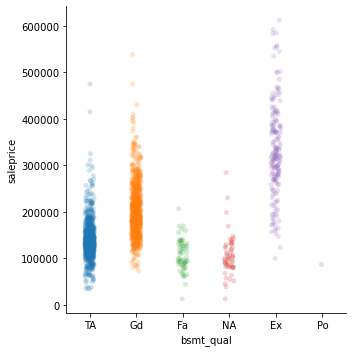

In [582]:
# plot it
sns.catplot(x = 'bsmt_qual', y='saleprice', data = train, alpha=0.2)

In [583]:
# dummy EX_GD together
train.bsmt_qual = train.bsmt_qual.map(lambda x: x == 'Gd' or x == 'Ex').astype(int)
train.rename(columns = {'bsmt_qual':'bsmt_qual_Ex_Gd'}, inplace=True)
train.head().iloc[:,9:19]

,mas_vnr_area,exter_qual_Ex_Gd,exter_cond_Ex_Gd,bsmt_qual_Ex_Gd,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2
pid,,,,,,,,,,
533352170,289.0,1,0,0,TA,No,GLQ,533.0,Unf,0.0
531379050,132.0,1,0,1,TA,No,GLQ,637.0,Unf,0.0
535304180,0.0,0,1,0,TA,No,GLQ,731.0,Unf,0.0
916386060,0.0,0,0,1,TA,No,Unf,0.0,Unf,0.0
906425045,0.0,0,0,0,Gd,No,Unf,0.0,Unf,0.0


### Cols [27:37]

In [ ]:
train.columns[27:37]

In [ ]:
train.dtypes[27:37]

# looks good!

In [ ]:
# check for nulls
train.isnull().sum()[27:37]

In [ ]:
# bsmt_cond
train[train.bsmt_cond.isnull()].has_basement.value_counts()

In [ ]:
# update to NA
train.bsmt_cond = train.bsmt_cond.map(lambda x: 'NA' if pd.isnull(x) else x)

In [ ]:
train.bsmt_cond.value_counts(normalize=True)

In [ ]:
# dummy to TA
train.bsmt_cond = train.bsmt_cond.map(lambda x: x == 'TA').astype(int)

train.rename(columns = {'bsmt_cond': 'bsmt_cond_is_TA'}, inplace=True)

train.head().iloc[:,27:]

In [ ]:
# bsmt_exposure
train[train.bsmt_exposure.isnull()].has_basement.value_counts()

In [ ]:
train.bsmt_exposure.map(lambda x: 0 if pd.isnull(x) else x).value_counts(normalize=True)

In [ ]:
basements[(basements.bsmt_exposure.isnull())&(~basements.bsmt_qual.isnull())]

In [ ]:
# impute to 'NA'
train.bsmt_exposure = train.bsmt_exposure.map(lambda x: 'NA' if pd.isnull(x) else x)

In [ ]:
train.bsmt_exposure.value_counts(normalize=True)

In [ ]:
# plot it
sns.catplot(x = 'bsmt_exposure', y = 'saleprice', data = train, alpha = 0.2);

In [ ]:
# dummy to no exposure
train.bsmt_exposure = train.bsmt_exposure.map(lambda x: x == 'No').astype(int)
train.rename(columns = {'bsmt_exposure': 'bsmt_exposure_No'}, inplace=True)

In [ ]:
# review bsmtfin_type_1
train.bsmtfin_type_1.unique()

In [ ]:
basements[(basements.bsmtfin_type_1.isnull())&(~basements.bsmt_qual.isnull())]

In [ ]:
# impute to 'NA'
train.bsmtfin_type_1 = train.bsmtfin_type_1.map(lambda x: 'NA' if pd.isnull(x) else x)

In [ ]:
train.bsmtfin_type_1.value_counts(normalize=True)

In [ ]:
# review bsmtfin_type_2
train.bsmtfin_type_2.unique()

In [ ]:
basements[(basements.bsmtfin_type_2.isnull())&(~basements.bsmt_qual.isnull())]

In [ ]:
# impute the others as 'NA'
temp = train.loc[528142130,'bsmtfin_type_2']
train.bsmtfin_type_2 = train.bsmtfin_type_2.map(lambda x: 'NA' if pd.isnull(x) else x)
train.loc[528142130,'bsmtfin_type_2'] = temp

In [ ]:
# get absolute membership

bsmtfins = pd.DataFrame(train.bsmtfin_type_1.map(lambda x: '0' if pd.isnull(x) else x)\
                        + ';' + train.bsmtfin_type_2.map(lambda x: '0' if pd.isnull(x) else x),\
                        columns = ['bsmtfins'])

bsmtfins.bsmtfins.value_counts()

In [ ]:
bsmtfins.bsmtfins.str.get_dummies(';').mean().sort_values()

In [ ]:
# review bsmtfin_sf_1
train.bsmtfin_sf_1.describe()

In [ ]:
train.bsmtfin_sf_2.describe()

In [ ]:
train.bsmt_unf_sf.describe()

In [ ]:
train.total_bsmt_sf.describe()

In [ ]:
pd.Series(train.total_bsmt_sf == (train.bsmt_unf_sf + train.bsmtfin_sf_2 + train.bsmtfin_sf_1)).value_counts()

**Observation**
  *  Create columns for each type of finished bsmt and its associated SF
    *  BSMT_GLQ_SF
    *  BSMT_ALQ_SF
    *  etc.

In [ ]:
train.loc[train.bsmtfin_type_1 == 'GLQ',['bsmtfin_sf_1']]

In [ ]:
train['bsmt_GLQ_sf'] = train.apply(lambda row: row.bsmtfin_sf_1 if row.bsmtfin_type_1 == 'GLQ'\
                                    else row.bsmtfin_sf_2 if row.bsmtfin_type_2 == 'GLQ'\
                                    else 0, axis = 1)

In [ ]:
train['bsmt_ALQ_sf'] = train.apply(lambda row: row.bsmtfin_sf_1 if row.bsmtfin_type_1 == 'ALQ'\
                                    else row.bsmtfin_sf_2 if row.bsmtfin_type_2 == 'ALQ'\
                                    else 0, axis = 1)

In [ ]:
train['bsmt_BLQ_sf'] = train.apply(lambda row: row.bsmtfin_sf_1 if row.bsmtfin_type_1 == 'BLQ'\
                                    else row.bsmtfin_sf_2 if row.bsmtfin_type_2 == 'BLQ'\
                                    else 0, axis = 1)

In [ ]:
train['bsmt_Rec_sf'] = train.apply(lambda row: row.bsmtfin_sf_1 if row.bsmtfin_type_1 == 'Rec'\
                                    else row.bsmtfin_sf_2 if row.bsmtfin_type_2 == 'Rec'\
                                    else 0, axis = 1)

In [ ]:
train['bsmt_LwQ_sf'] = train.apply(lambda row: row.bsmtfin_sf_1 if row.bsmtfin_type_1 == 'LwQ'\
                                    else row.bsmtfin_sf_2 if row.bsmtfin_type_2 == 'LwQ'\
                                    else 0, axis = 1)

In [ ]:
pd.Series(train.total_bsmt_sf ==\
train['bsmt_GLQ_sf']+train['bsmt_ALQ_sf']+train['bsmt_Rec_sf']+train['bsmt_LwQ_sf']+train['bsmt_BLQ_sf']+train.bsmt_unf_sf)\
.value_counts()

In [ ]:
train[train.total_bsmt_sf !=\
      train['bsmt_GLQ_sf']+train['bsmt_ALQ_sf']+train['bsmt_Rec_sf']+train['bsmt_LwQ_sf']\
      +train['bsmt_BLQ_sf']+train.bsmt_unf_sf].loc[:,['bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',\
                                                      'bsmt_unf_sf','total_bsmt_sf']]



In [ ]:
# adjust pid 531451110
train.loc[531451110,'bsmt_BLQ_sf'] = 662

# adjust pid 527455030
train.loc[527455030,'bsmt_unf_sf'] = 429


In [ ]:
train[train.total_bsmt_sf !=\
      train['bsmt_GLQ_sf']+train['bsmt_ALQ_sf']+train['bsmt_Rec_sf']+train['bsmt_LwQ_sf']\
      +train['bsmt_BLQ_sf']+train.bsmt_unf_sf].loc[:,['bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',\
                                                      'bsmt_unf_sf','total_bsmt_sf']]



In [ ]:
train.head().iloc[:,-7:]

In [ ]:
# review heating
train.heating.unique()

train.heating.value_counts()

In [ ]:
# create dummy for GasA
train.heating = train.heating.map(lambda x: x == 'GasA').astype(int)
train.rename(columns = {'heating': 'heating_is_GasA'}, inplace=True)
train.head().iloc[:,27:37]

In [ ]:
# review heating_qc
train.heating_qc.unique()

train.heating_qc.value_counts(normalize=True)

In [ ]:
# plot it
sns.catplot(x = 'heating_qc', y = 'saleprice', data=train, alpha = 0.2);

In [ ]:
# dummy 'Ex', 'Gd'
train = train.join(pd.get_dummies(train.heating_qc, prefix = 'heating_qc').loc[:,['heating_qc_Ex','heating_qc_Gd']])

train.head().iloc[:,-2:]

### Cols [37:47]

In [ ]:
train.columns[37:47]

In [ ]:
train.dtypes[37:47]

In [ ]:
train.isnull().sum()[37:47]

In [ ]:
# investigate bsmt_full_bath
train[train.bsmt_full_bath.isnull()].has_basement

In [ ]:
# impute with 0
train.bsmt_full_bath = train.bsmt_full_bath.map(lambda x: 0 if pd.isnull(x) else x)

In [ ]:
# investigate bsmt_full_bath
train[train.bsmt_half_bath.isnull()].has_basement

In [ ]:
# impute with 0
train.bsmt_half_bath = train.bsmt_half_bath.map(lambda x: 0 if pd.isnull(x) else x)

In [ ]:
train.isnull().sum()[37:47]

In [ ]:
# review central_air
train.central_air.unique()


In [ ]:
# dummy
train.central_air = train.central_air.map(lambda x: x == 'Y').astype(int)
train.rename(columns = {'central_air':'has_central_air'}, inplace=True)
train.head().iloc[:,37:47]

In [ ]:
# review electrical
train.electrical.unique()

train.electrical.value_counts(normalize=True)

In [ ]:
# dummy to is_SBrkr
train.electrical = train.electrical.map(lambda x: x == 'SBrkr').astype(int)
train.rename(columns = {'electrical':'electrical_is_SBrkr'}, inplace=True)
train.head().iloc[:,37:47]

In [ ]:
# review 1st_flr_sf
train['1st_flr_sf'].describe()

In [ ]:
# plot it
plt.scatter(train['1st_flr_sf'], train.saleprice)

In [ ]:
# drop two outliers
train = train[train['1st_flr_sf']<=3500]

In [ ]:
# review 2nd_flr_sf
train['2nd_flr_sf'].describe()

In [ ]:
# plot it
plt.scatter(train['2nd_flr_sf'], train.saleprice)

In [ ]:
train['2nd_flr_sf'].value_counts(normalize=True)

In [ ]:
# create dummy for has 2nd_flr_sf
has_2nd_flr = train['2nd_flr_sf'].map(lambda x: x>0).astype(int)
train = train.join(has_2nd_flr.rename('has_2nd_flr'))
train

In [ ]:
# review low_qual_fin_sf
train.low_qual_fin_sf.describe()

train.low_qual_fin_sf.value_counts(normalize=True)

In [ ]:
# dummy it
train.low_qual_fin_sf = train.low_qual_fin_sf.map(lambda x: x>0).astype(int)
train.rename(columns = {'low_qual_fin_sf': 'has_low_qual_fin_sf'}, inplace= True)
train.head().iloc[:,37:47]

In [ ]:
# review gr_liv_area
train.gr_liv_area.describe()

In [ ]:
# plot
plt.scatter(train.gr_liv_area, train.saleprice, alpha=0.2);

**Observation**
  *  Love it!

In [ ]:
# review train.bsmt_full_bath
train.bsmt_full_bath.unique()

train.bsmt_full_bath.value_counts(normalize = True)

In [ ]:
# plot
plt.scatter(train.bsmt_full_bath, train.saleprice, alpha=0.2);

In [ ]:
# review train.bsmt_half_bath
train.bsmt_half_bath.unique()

train.bsmt_half_bath.value_counts(normalize = True)

In [ ]:
# plot
plt.scatter(train.bsmt_half_bath, train.saleprice, alpha=0.2);

In [ ]:
# review full_bath
train.full_bath.unique()

train.full_bath.value_counts()

In [ ]:
# plot
plt.scatter(train.full_bath, train.saleprice, alpha=0.2);

In [ ]:
# review full_bath
train.half_bath.unique()

train.half_bath.value_counts()

In [ ]:
# plot
plt.scatter(train.half_bath, train.saleprice, alpha=0.2);

In [ ]:
# create total full baths
train['total_full_baths'] = train.bsmt_full_bath + train.full_bath

In [ ]:
# plot
plt.scatter(train.total_full_baths, train.saleprice, alpha=0.2);

In [ ]:
# create total half baths
train['total_half_baths'] = train.bsmt_half_bath + train.half_bath

In [ ]:
# plot
plt.scatter(train.total_half_baths, train.saleprice, alpha=0.2);

In [ ]:
# total baths?
train['total_baths'] = train.total_full_baths + train.total_half_baths

In [ ]:
# plot
plt.scatter(train.total_baths, train.saleprice, alpha=0.2);

In [ ]:
train.total_baths.describe()

### Cols [47:57]

In [ ]:
train.columns[47:57]

In [ ]:
train.dtypes[47:57]

In [ ]:
# check nulls
train.isnull().sum()[47:57]

In [ ]:
# investigate fireplace_qu
train.fireplace_qu.unique()

In [ ]:
train[train.fireplace_qu.isnull()].fireplaces.unique()

In [ ]:
# impute with 'NA'
train.fireplace_qu = train.fireplace_qu.map(lambda x: 'NA' if pd.isnull(x) else x)

In [ ]:
# investigate garage_type
train.garage_type.unique()

In [ ]:
train[train.garage_type.isnull()].garage_yr_blt.unique()

In [ ]:
# impute with 'NA'
train.garage_type = train.garage_type.map(lambda x: 'NA' if pd.isnull(x) else x)

In [ ]:
# investigate garage_yr_blt
train.garage_yr_blt.unique()

In [ ]:
train[(train.garage_yr_blt.isnull())&(train.garage_type != 'NA')].garage_type

In [ ]:
# look at house built vs garage built
# create garage age
garage_age = train.garage_yr_blt.map(lambda x: 2010 - x if ~pd.isnull(x) else x)
garage_age.rename('garage_age', inplace=True)
train = train.join(garage_age)

In [ ]:
# compare hosue age to garage age
pd.Series(train.home_age - train.garage_age).describe()

In [ ]:
train.garage_yr_blt.describe()

In [ ]:
# make year 2207 null
train.loc[916384070,'garage_yr_blt'] = np.nan


In [ ]:
train.garage_yr_blt.describe()

In [ ]:
# retry comparison garage_age
pd.Series(train.home_age - train.garage_age).describe()

In [ ]:
# review nulls again
train[(train.garage_yr_blt.isnull())&(train.garage_type != 'NA')].garage_type

In [ ]:
# imput with garage date 5 years beyond yr house built
train.loc[[916384070,910201180], 'year_built']

In [ ]:
train.loc[916384070,'garage_yr_blt'] = 2010
train.loc[910201180,'garage_yr_blt'] = 1928
train.loc[[916384070,910201180], 'garage_yr_blt']

In [ ]:
# review garage_fin
train.garage_finish.unique()

train[train.garage_finish.isnull()].garage_yr_blt.value_counts()

In [ ]:
# impute by most common
train.garage_finish.value_counts()

In [ ]:
train.loc[910201180,'garage_finish'] = 'Unf'
train[train.garage_finish.isnull()].garage_yr_blt.value_counts()

In [ ]:
train.isnull().sum()[47:57]

In [ ]:
# finalize imputation with garage_finish NA, keep garage yr null
train.garage_finish = train.garage_finish.map(lambda x: 'NA' if pd.isnull(x) else x)

In [ ]:
train.isnull().sum()[47:57]

In [ ]:
# review bedroom_abvgr
train.bedroom_abvgr.unique()

train.bedroom_abvgr.value_counts(normalize=True)

In [ ]:
# plot it
plt.scatter(train.bedroom_abvgr, train.saleprice, alpha = 0.2)

In [ ]:
# review kitchen_abvgr
train.kitchen_abvgr.unique()

train.kitchen_abvgr.value_counts(normalize=True)

In [ ]:
# plot it
plt.scatter(train.kitchen_abvgr, train.saleprice, alpha = 0.2)

In [ ]:
# drop column
train.drop('kitchen_abvgr', axis = 1, inplace=True)
train.head().iloc[:,47:57]

In [ ]:
# review kitchenqual
train.kitchen_qual.unique()

train.kitchen_qual.value_counts(normalize=True)

In [ ]:
# plot it
sns.catplot(x = 'kitchen_qual', y='saleprice', data=train, alpha = 0.2)

In [ ]:
# dummy
train.kitchen_qual = train.kitchen_qual.map(lambda x: x == 'Ex' or x == 'Gd').astype(int)
train.rename(columns = {'kitchen_qual': 'kitchen_qual_Ex_Gd'}, inplace=True)
train.head().iloc[:,47:57]

In [ ]:
# review totrms_abvgrd
train.totrms_abvgrd.unique()
train.totrms_abvgrd.value_counts(normalize=True)

In [ ]:
# plot it
plt.scatter(x = train.totrms_abvgrd, y = train.saleprice, alpha = 0.5);

In [ ]:
# review functional
train.functional.unique()

train.functional.value_counts(normalize=True)

In [ ]:
# dummy for is_typical
train.functional = train.functional.map(lambda x: x == 'Typ').astype(int)
train.rename(columns = {'functional': 'is_functional'}, inplace = True)
train.head().iloc[:,47:57]

In [ ]:
#review fireplaces
train.fireplaces.unique()

train.fireplaces.value_counts(normalize=True)

In [ ]:
# plot it
plt.scatter(x = train.fireplaces, y=train.saleprice, alpha = 0.2);

In [ ]:
# dummy to has fireplace
train.fireplaces = train.fireplaces.map(lambda x: x != 0).astype(int)
train.rename(columns = {'fireplaces': 'has_fireplace'}, inplace = True)
train.head().iloc[:,47:57]

In [ ]:
# review fireplacequ
train.fireplace_qu.unique()

train[train.has_fireplace == 0].fireplace_qu.unique()

train.fireplace_qu.value_counts(normalize=True)

In [ ]:
# plot it
sns.catplot(x = 'fireplace_qu', y='saleprice', data=train, alpha = 0.2);

In [ ]:
# dummy to fireplace_qu_Ex_Gd
train.fireplace_qu = train.fireplace_qu.map(lambda x: x == 'Ex' or x == 'Gd').astype(int)
train.rename(columns = {'fireplace_qu': 'fireplace_qu_Ex_Gd'}, inplace=True)
train.head().iloc[:,47:57]

In [ ]:
# review garage type
train.garage_type.unique()

train.garage_type.value_counts(normalize=True)

In [ ]:
# plot it
sns.catplot(x = 'garage_type', y = 'saleprice', data=train, alpha=0.2);

In [ ]:
# create dummy attchd or builtin
train.garage_type = train.garage_type.map(lambda x: x == 'Attchd' or x == 'BuiltIn').astype(int)
train.rename(columns = {'garage_type': 'garage_type_Attchd_BuiltIn'}, inplace=True)
train.head().iloc[:,47:57]

In [ ]:
# garage yr built
plt.scatter(x = train.garage_yr_blt, y = train.saleprice, alpha = 0.5, color = 'rebeccapurple');

In [ ]:
# split into two groups
# (train.groupby(['garage_yr_blt']).mean()['saleprice'] > train.saleprice.describe()['mean'])
train.groupby(pd.cut(train.garage_yr_blt, bins = range(1980, 2011, 5))).mean().saleprice\
          > train.saleprice.describe()['mean']+train.saleprice.describe()['std']

In [ ]:
# bin into garage >= 2006 and has garage
garage_new_2006 = train.garage_yr_blt.map(lambda x: x > 2005).astype(int).rename('garage_new_2006')
has_garage = train.garage_yr_blt.map(lambda x: 0 if pd.isnull(x) else 1).rename('has_garage')


train = train.join([garage_new_2006,has_garage])
train.head().iloc[:,-2:]

In [ ]:
# review garage_finish
train.garage_finish.unique()
train.garage_finish.value_counts(normalize=True)

In [ ]:
# plot
sns.catplot(x = 'garage_finish', y = 'saleprice', data=train, alpha=0.2);

In [ ]:
# dummy it
train = train.join(pd.get_dummies(train.garage_finish, prefix = 'garage_finish')\
                .loc[:,['garage_finish_RFn','garage_finish_Unf','garage_finish_Fin']])

## Col [56:66]

In [ ]:
train.columns[56:66]

In [ ]:
train.dtypes[56:66]

In [ ]:
train.isnull().sum()[56:66]

In [ ]:
# review garage_cars
train.garage_cars.unique()
train.garage_cars.map(lambda x: -1 if pd.isnull(x) else x).value_counts(normalize=True)

In [ ]:
train[train.garage_cars.isnull()].has_garage

In [ ]:
# impute with mean
train.loc[910201180,'garage_cars'] = round(train.garage_cars.describe()['mean'],0)

In [ ]:
# impute with mean
train.loc[910201180,'garage_area'] = round(train.garage_area.describe()['mean'],0)

In [ ]:
train.loc[910201180,['garage_qual','garage_cond']]

In [ ]:
train.loc[910201180,'garage_qual'] = 'TA'
train.loc[910201180,'garage_cond'] = 'TA'

In [ ]:
train.isnull().sum()[56:66]

In [ ]:
# review garage_cars
train.garage_cars.unique()
train.garage_cars.value_counts(normalize=True)

In [ ]:
# plot it
plt.scatter(x = train.garage_cars, y=train.saleprice, alpha=0.2);

In [ ]:
# review garage area
plt.scatter(x = train.garage_area, y=train.saleprice, alpha=0.2);

In [ ]:
# review garage_qual
train.garage_qual.unique()

In [ ]:
train[train.garage_qual.isnull()].has_garage.value_counts()

In [ ]:
# impute with 'NA'
train.garage_qual = train.garage_qual.map(lambda x: 'NA' if pd.isnull(x) else x)

In [ ]:
train.garage_qual.value_counts(normalize=True)

In [ ]:
#plot it
sns.catplot(x = 'garage_qual', y='saleprice', data=train, alpha=0.2)

In [ ]:
# dummy to isEx,Gd,TA
train.garage_qual = train.garage_qual.map(lambda x: x == 'TA' or x == 'Gd' or x == 'Ex').astype(int)
train.rename(columns = {'garage_qual': 'garage_qual_Ex_Gd_TA'}, inplace = True)
train.head().iloc[:,56:66]

In [ ]:
# review garage cond
train.garage_cond.unique()

In [ ]:
train[train.garage_cond.isnull()].has_garage.value_counts()

In [ ]:
# impute with'NA'
train.garage_cond = train.garage_cond.map(lambda x: 'NA' if pd.isnull(x) else x)

In [ ]:
train.garage_cond.value_counts(normalize=True)

In [ ]:
# plot it
sns.catplot(x = 'garage_cond', y='saleprice', data=train, alpha=0.2);

In [ ]:
# dummy to isEx,Gd,TA
train.garage_cond = train.garage_cond.map(lambda x: x == 'TA' or x == 'Gd' or x == 'Ex').astype(int)
train.rename(columns = {'garage_cond': 'garage_cond_Ex_Gd_TA'}, inplace = True)
train.head().iloc[:,56:66]

In [ ]:
# review paved
train.paved_drive.unique()
train.paved_drive.value_counts(normalize=True)

In [ ]:
# plot it
sns.catplot(x = 'paved_drive', y='saleprice', data=train, alpha=0.2)

In [ ]:
# dummy to is_fully_paved_drive
train.paved_drive = train.paved_drive.map(lambda x: x == 'Y').astype(int)
train.rename(columns = {'paved_drive': 'is_fully_paved_drive'}, inplace = True)
train.head().iloc[:,56:66]

In [ ]:
# create new variable for porch_sf
train['all_porch_sf'] = train.enclosed_porch + train.open_porch_sf + train.wood_deck_sf + train['3ssn_porch']+train.screen_porch

In [ ]:
plt.scatter(x = train.all_porch_sf,
            y = train.saleprice,
            alpha = 0.5);

In [ ]:
train.all_porch_sf.describe()

In [ ]:
#creat has porch
has_porch = train.all_porch_sf.map(lambda x: x > 0).astype(int).rename('has_porch')
train['has_porch'] = has_porch
train.head().iloc[:,-1:]

## Col [66:76]

In [ ]:
train.columns[66:74]

In [ ]:
train.dtypes[66:74]

In [ ]:
train.isnull().sum()[66:74]

In [ ]:
# investigate pool_qc
train[train.pool_qc.isnull()].pool_area.value_counts()

In [ ]:
# impute to 'NA'
train.pool_qc = train.pool_qc.map(lambda x: 'NA' if pd.isnull(x) else x)

In [ ]:
# investigate fence
train.fence.unique()

In [ ]:
# impute to 'NA'
train.fence = train.fence.map(lambda x: 'NA' if pd.isnull(x) else x)

In [ ]:
# investigate misc_feature
train[train.misc_feature.isnull()].misc_val.value_counts()

In [ ]:
# impute to 'NA'
train.misc_feature = train.misc_feature.map(lambda x: 'NA' if pd.isnull(x) else x)

In [ ]:
# review pool_area
train.pool_area.value_counts(normalize=True)

In [ ]:
# plot it
plt.scatter(x = train.pool_area, y = train.saleprice, alpha = 0.2);

In [ ]:
# drop it
train.drop('pool_area', axis = 1, inplace=True)

In [ ]:
# review pool_qc
train.pool_qc.value_counts(normalize=True)

In [ ]:
# drop it
train.drop('pool_qc', axis = 1, inplace=True)

In [ ]:
# review fence
train.fence.value_counts(normalize=True)

In [ ]:
# plot
sns.catplot(x = 'fence', y='saleprice', data=train, alpha=0.2)

In [ ]:
# dummy has_fence
train.fence = train.fence.map(lambda x: x == 'NA').astype(int)
train.rename(columns = {'fence': 'has_fence'}, inplace = True)
train.head().iloc[:,66:76]

In [ ]:
# review misc_feature
train.misc_feature.value_counts(normalize=True)

In [ ]:
# plot it
sns.catplot(x = 'misc_feature', y='saleprice', data=train, alpha=0.2)

In [ ]:
# drop it
train.drop('misc_feature', axis = 1, inplace=True)

In [ ]:
# review misc_val
train.misc_val.value_counts(normalize=True)

In [ ]:
# drop it
train.drop('misc_val', axis = 1, inplace=True)

In [ ]:
# review mo_sold
train.mo_sold.unique()

train.mo_sold.value_counts(normalize=True)

In [ ]:
# plot it
sns.catplot(x = 'mo_sold', y='saleprice', data=train, alpha=0.2)

In [ ]:
# maybe link with yr sold
# review with yr sold
train.yr_sold.unique()

train.yr_sold.value_counts(normalize=True)

In [ ]:
# plot it
sns.catplot(x = 'yr_sold', y='saleprice', data=train, alpha=0.2)

In [ ]:
train.groupby('yr_sold').mean().saleprice

In [ ]:
train.groupby('mo_sold').mean().saleprice

In [ ]:
# premium months
sold_premium_month = train.mo_sold.map(train.groupby('mo_sold').mean().saleprice > saleprice_mean).astype(int)
train['sold_premium_month']= sold_premium_month

In [ ]:
saleprice_mean

In [ ]:
# dummy years
yr_sold_dummies = pd.get_dummies(train.yr_sold, prefix = 'yr_sold')\
                  .loc[:,['yr_sold_2006','yr_sold_2007','yr_sold_2008','yr_sold_2009']]

train = train.join(yr_sold_dummies)

In [ ]:
# review sale type
train.sale_type.unique()

train.sale_type.value_counts(normalize=True)

In [ ]:
#plot it
sns.catplot(x = 'sale_type', y='saleprice', data=train, alpha=0.2);

In [ ]:
# dummy to is WD and is New
sale_type_WD = train.sale_type.map(lambda x: x == 'WD').astype(int).rename('sale_type_WD')
sale_type_New = train.sale_type.map(lambda x: x == 'New').astype(int).rename('sale_type_New')
train = train.join([sale_type_WD,sale_type_New])